## TODO
* Re-write for more than two classes
* Add size binning
* First fix FI, then FM
* Monte Carlo sim to test all permutations; OR:
* Increment steps based on PDF, with each step having an equal prob.
* install add-ons: git, variable inspector: first install node.js, npm, jupyterlab-git

## Description
This script takes as input the landscape inundation fraction, the emergent macrophyte fraction (fraction of all inundated areas), and flux values for these fractions. It then iterates over probable ranges and plots the total flux's sensitivities to these values, Normalized by area.


| Name  | Description | Value |
|---      |---                |---       |
| INPUTS |
FLUXES | Dictionary of flux values by class	| OW: (0, 166); EM: (77, 5800)
FRACTION:IN_TOTAL | Fraction inundated: Range for open water and emergent macrophyte area divided by total landscape area | (10, 38)
FRACTION:EM | Fraction EMERGENT macrophyte: Range for emergent macrophyte area / open water area | (2, 60)
FRACTION:  ... | ...
FRACTION_STEPS | Number of steps for each landcover type (range / increment) |
FLUX_STEPS | Number of steps for flux (range / increment) |


In [179]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as ndi 
%matplotlib inline

In [175]:
## inputs

# fluxes={'OW': 100,
#        'GW': 300,
#        'SW': 200}

FRACTION={
    'IN_TOTAL':(10, 38), # Fraction Inundated; From Run 35
    'EM':(2, 60) # Fraction macrophyte: From Run 35
}
FLUXES={
    'OW': (0, 166), # Open water; From range in: Burger et al 2016	Biogeosciences
    'EM': (77, 5800)  # Emergent macrophyte; From range in: Burger et al 2016	Biogeosciences
}
FRACTION_STEPS=20
FLUX_STEPS=20

In [176]:
SENSITIVITY=np.zeros((FRACTION_STEPS, FLUX_STEPS), 'double') # init
FRACTION_POSTINGS=np.linspace(FRACTION['EM'][0], FRACTION['EM'][1], FRACTION_STEPS)
FLUX_POSTINGS={}
for Class in FLUXES.keys():
    FLUX_POSTINGS[Class]=np.linspace(FLUXES[Class][0], FLUXES[Class][1], FLUX_STEPS)
for i in range(FRACTION_STEPS):
    for j in range(FLUX_STEPS):
        SENSITIVITY[i,j] = np.mean(FRACTION['IN_TOTAL']) / 100 / 100 * (FRACTION_POSTINGS[i] * FLUX_POSTINGS['EM'][j] + # use median?
                            (100- FRACTION_POSTINGS[i]) * FLUX_POSTINGS['OW'][j])          
        

In [177]:
FRACTION_POSTINGS
FLUX_POSTINGS['OW'][j]
# FLUX_POSTINGS['EM'][j] 

166.0

Mean flux: 	232.4 mg CH_4/m^2/day
'Median' flux: 	357.7 mg CH_4/m^2/day

INPUTS:
FRACTION:	{'IN_TOTAL': (10, 38), 'EM': (2, 60)}
FLUXES:		{'OW': (0, 166), 'EM': (77, 5800)}

Saved fig to:	/mnt/d/pic/UAVSAR_classification/upscaleSensitivityRaster.png


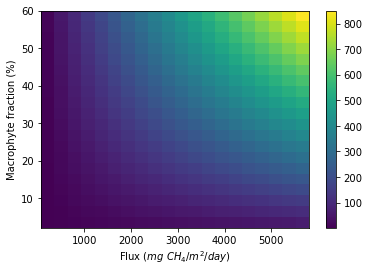

In [195]:
# plt.xticks(FLUX_POSTINGS[0:4:])
# plt.yticks(FRACTION_POSTINGS[0:4:])
p=plt.imshow(SENSITIVITY, origin='lower', aspect='auto', extent=(FLUXES['EM'][0], FLUXES['EM'][1], FRACTION['EM'][0], FRACTION['EM'][1]))
plt.xlabel("Flux ($mg\ CH_4 / m^2 /day$)")
plt.ylabel('Macrophyte fraction (%)')
plt.colorbar()
axes=plt.gca()
# plt.rcParams({'dpi':300})
# axes.set_xlim(FLUXES['EM'])
# axes.set_ylim(FRACTION['EM'])
# plt.xticks(FLUX_POSTINGS[0:4:])
# plt.yticks(FRACTION_POSTINGS[0:4:])

## calculate median:
cy, cx = ndi.center_of_mass(SENSITIVITY)

## report mean value:
print('Mean flux: \t{:.1f} mg CH_4/m^2/day'.format(np.mean(SENSITIVITY)))
print('\'Median\' flux: \t{:.1f} mg CH_4/m^2/day'.format(SENSITIVITY[cy.astype(int),cx.astype(int)])) # only equal to median if each step size is of equal prob.

print('''\nINPUTS:
FRACTION:\t{}
FLUXES:\t\t{}
'''.format(FRACTION, FLUXES))
figPth='/mnt/d/pic/UAVSAR_classification/upscaleSensitivityRaster.png'
plt.savefig(figPth, dpi=200)
print('Saved fig to:\t{}'.format(figPth))